In [18]:
# Raw Package
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr

# Market Data 
import yfinance as yf

#Graphing/Visualization
import datetime as dt 
import plotly.graph_objs as go 

# Override Yahoo Finance 
yf.pdr_override()

# Create input field for our desired stock 
# stock=input("Enter a stock ticker symbol: ")
stock = 'BTC-USD'

# Retrieve stock data frame (df) from yfinance API at an interval of 1m 
df = yf.download(tickers=stock,period='1d',interval='1m')
# df = yf.download(tickers=stock,period='1y')
# df = yf.download(tickers=stock,period='1month', interval='1m')

print(df)

# Declare plotly figure (go)
fig=go.Figure()

fig.add_trace(go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'], name = 'market data'))

fig.update_layout(
    title= str(stock)+' Live Share Price:',
    yaxis_title='Stock Price (USD per Shares)')               

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),

            dict(count=7, label="week", step="day", stepmode="backward"),
            dict(count=30, label="30days", step="day", stepmode="backward"),
            
            dict(step="all")
        ])
    )
)

fig.show()

[*********************100%***********************]  1 of 1 completed
                                   Open          High           Low  \
Datetime                                                              
2023-04-08 00:01:00+00:00  27923.943359  27923.943359  27923.943359   
2023-04-08 00:02:00+00:00  27923.626953  27923.626953  27923.626953   
2023-04-08 00:03:00+00:00  27921.976562  27921.976562  27921.976562   
2023-04-08 00:05:00+00:00  27920.857422  27920.857422  27920.857422   
2023-04-08 00:06:00+00:00  27920.689453  27920.689453  27920.689453   
...                                 ...           ...           ...   
2023-04-08 20:54:00+00:00  27934.765625  27934.765625  27934.765625   
2023-04-08 20:55:00+00:00  27935.177734  27935.177734  27935.177734   
2023-04-08 20:56:00+00:00  27938.980469  27938.980469  27938.980469   
2023-04-08 20:57:00+00:00  27939.257812  27939.257812  27939.257812   
2023-04-08 20:58:00+00:00  27936.259766  27936.259766  27936.259766   

       

In [1]:
# pip install pandas_datareader
# !pip install mplfinance

In [78]:
import yfinance as yf
import mplfinance as mpf
import time
from datetime import datetime, timedelta

[*********************100%***********************]  1 of 1 completed


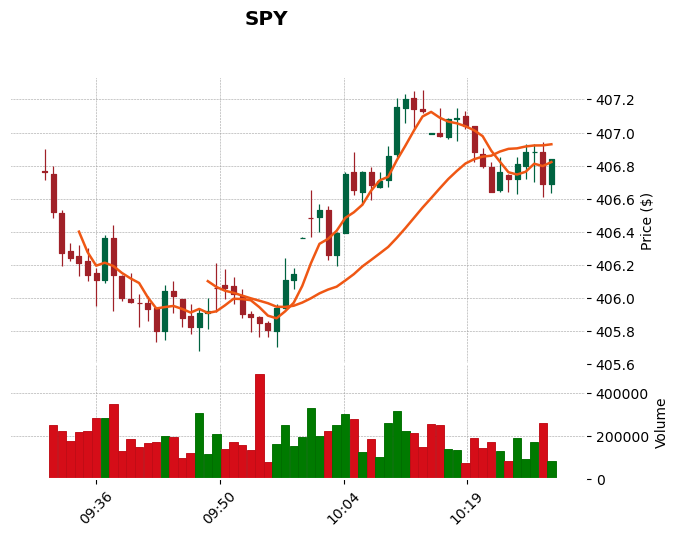

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

KeyboardInterrupt: 

In [79]:
ticker = "SPY"
# Download data from Yahoo Finance API
# data = yf.download("BTC-USD", period="1d", interval="1m")

# Define the start and end times for the data
start_time =  datetime.strptime('2023-04-06 09:30:00', '%Y-%m-%d %H:%M:%S')
end_time = datetime.strptime('2023-04-06 10:30:00', '%Y-%m-%d %H:%M:%S')
data = yf.download(ticker, start=start_time, end=end_time, interval="1m")

#pd.concat([data.head(), '...', data.tail()])

# data.head()

# Plot the data using mplfinance
# mpf.plot(data, type='candle', mav=(3,6,9), volume=True, title="BTC-USD Candlestick Chart - 1 Minute Time Frame - 1 Day")

# mpf.plot(data, type='candle', mav=(3,6,9), volume=True, title="BTC-USD Candlestick Chart - 1 Minute Time Frame - 1 Day")

# Create the candlestick chart with green and red candles
mpf.plot(data, type="candle", volume=True, style="charles",
         title=ticker, ylabel="Price ($)", ylabel_lower="Volume",
         mav=(5,20), show_nontrading=True)
#         colorup='green', colordown='red')

interval = '1m'

# Continuously update the chart data and layout
while True:
    
    
    start_time += timedelta(minutes=1)
    end_time += timedelta(minutes=1)

    # Fetch the latest data
    latest_data = yf.download(ticker, start=start_time, end=end_time, interval="1m")

    # Update the chart data with the latest data
    fig.update(
        data=[go.Candlestick(x=latest_data.index,
                              open=latest_data['Open'],
                              high=latest_data['High'],
                              low=latest_data['Low'],
                              close=latest_data['Close'])]
    )

    # Update the chart layout
    fig.update_layout(
        title=f"{ticker} Real-Time Candlestick Chart",
        yaxis_title="Price",
        xaxis_rangeslider_visible=False,
        xaxis_title="Time",
        yaxis=dict(
            tickformat=".2f"
        )
    )

    # Delay for some time before fetching the next data
    time.sleep(1)  # Wait for 60 seconds


In [69]:
# Create the candlestick chart with green and red candles
fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'],
                                     increasing=dict(line=dict(color='green')),
                                     decreasing=dict(line=dict(color='red'))
                                    )
                     ])

# Add axis labels and title
fig.update_layout(title=ticker,
                  yaxis_title='Price ($)',
                  xaxis_title='Date')

# Display the plot
fig.show()